# Part I: Data Preparation


#import modules to dealing with data set

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler , OneHotEncoder

from matplotlib.pyplot import figure, imshow, axis

#DEEP LEARNING
from keras.layers.core import Dense
from keras.layers import Dropout
from tensorflow import keras
from keras.models import Sequential
from keras import regularizers
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.optimizers import Optimizer
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.optimizers import RMSprop

In [3]:
import keras_tuner as kt


# load dataset from CSVs files

In [4]:
#read dataset into files 
train=pd.read_csv('/content/train.csv') #train dataset
test=pd.read_csv('/content/test.csv') #test dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#display the first three row of the train set
train.head(3)

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.0,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.0,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.0,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930


In [7]:
#display the first three row of the test set
test.head(3)

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.0,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.0,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.128910,0.0,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000


In [8]:
print(train.shape)
print(test.shape)

(990, 194)
(594, 193)



Describing a DataFrame. By default only numeric fields are returned.


In [9]:
train.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [10]:
test.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,780.673401,0.017562,0.028425,0.031858,0.022556,0.014527,0.037497,0.019222,0.001085,0.007092,...,0.035291,0.005923,0.015033,0.011762,0.015881,0.011217,0.002617,0.019975,0.009389,0.020970
std,465.646977,0.019585,0.038351,0.025719,0.028797,0.018029,0.051372,0.017122,0.002697,0.009515,...,0.064482,0.026934,0.022318,0.024771,0.014898,0.052530,0.011204,0.034704,0.013457,0.023407
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,368.500000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,774.000000,0.009766,0.010743,0.023438,0.013672,0.007812,0.013672,0.015625,0.000000,0.005859,...,0.003906,0.000000,0.005859,0.001953,0.012695,0.000000,0.000000,0.003418,0.002930,0.013184
75%,1184.500000,0.028809,0.041016,0.042969,0.027344,0.019531,0.056641,0.029297,0.000000,0.007812,...,0.038086,0.000000,0.019531,0.010498,0.022461,0.000000,0.000000,0.022461,0.014648,0.032227
max,1583.000000,0.085938,0.189450,0.167970,0.164060,0.093750,0.271480,0.087891,0.021484,0.083984,...,0.353520,0.441410,0.153320,0.177730,0.083984,0.606450,0.123050,0.247070,0.086914,0.149410


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Columns: 193 entries, id to texture64
dtypes: float64(192), int64(1)
memory usage: 895.8 KB


# Clean the data set

check the null value

In [13]:
#check the null values (train set)
train.isnull().sum()

id           0
species      0
margin1      0
margin2      0
margin3      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 194, dtype: int64

In [14]:
#check the null values (test set)
test.isnull().sum()

id           0
margin1      0
margin2      0
margin3      0
margin4      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 193, dtype: int64

Check for duplicates 

In [15]:

#check for duplicates (train set)
train.duplicated().sum()

0

In [16]:
#check for duplicates (test set)
test.duplicated().sum()

0

There is no missing values or duplicates

**Draw some of the images**

In [17]:
import cv2
import glob

images = []
files = glob.glob ("/content/drive/MyDrive/images/*.jpg")
for myFile in files:
    image = cv2.imread(myFile, cv2.IMREAD_GRAYSCALE)
    images.append(image)

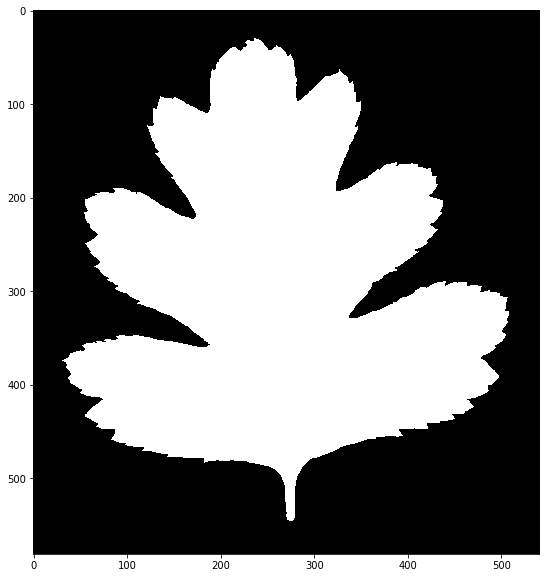

In [31]:
plt.figure(figsize=(15,10))
plt.imshow(images[0],cmap='gray', interpolation='nearest')


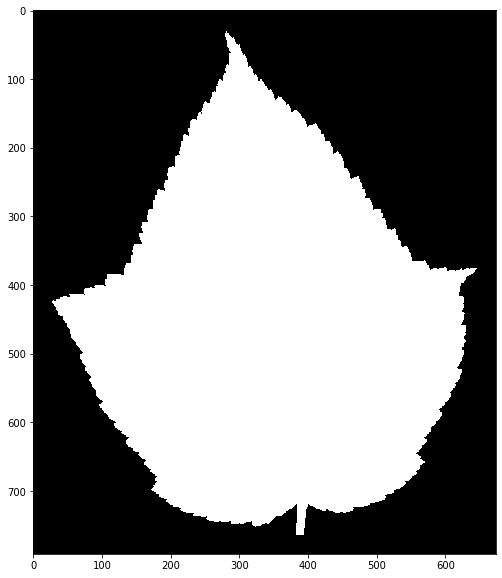

In [32]:
plt.figure(figsize=(15,10))
plt.imshow(images[2],cmap='gray', interpolation='nearest')


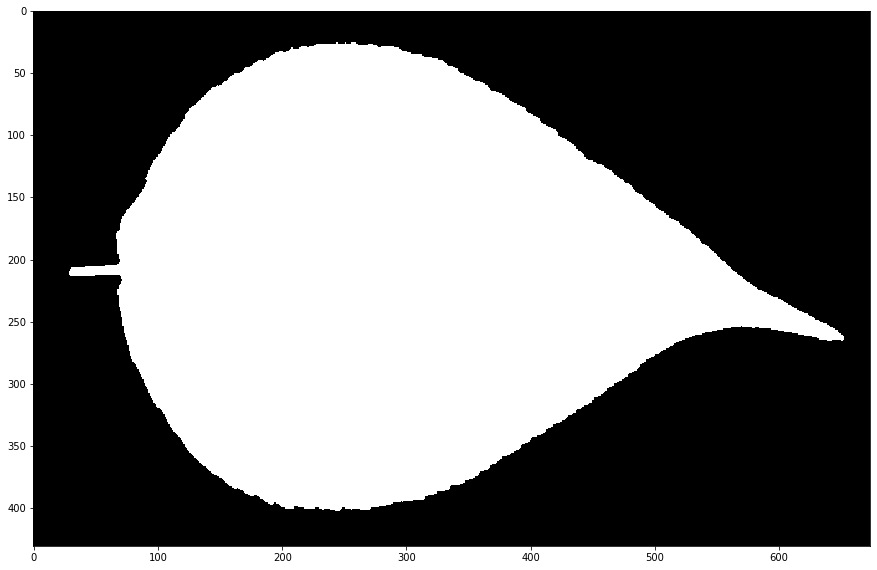

In [33]:
plt.figure(figsize=(15,10))
plt.imshow(images[5],cmap='gray', interpolation='nearest')

Carry out required correlation analysis (train data)


Text(0.5, 1.0, 'Correlation Matrix')

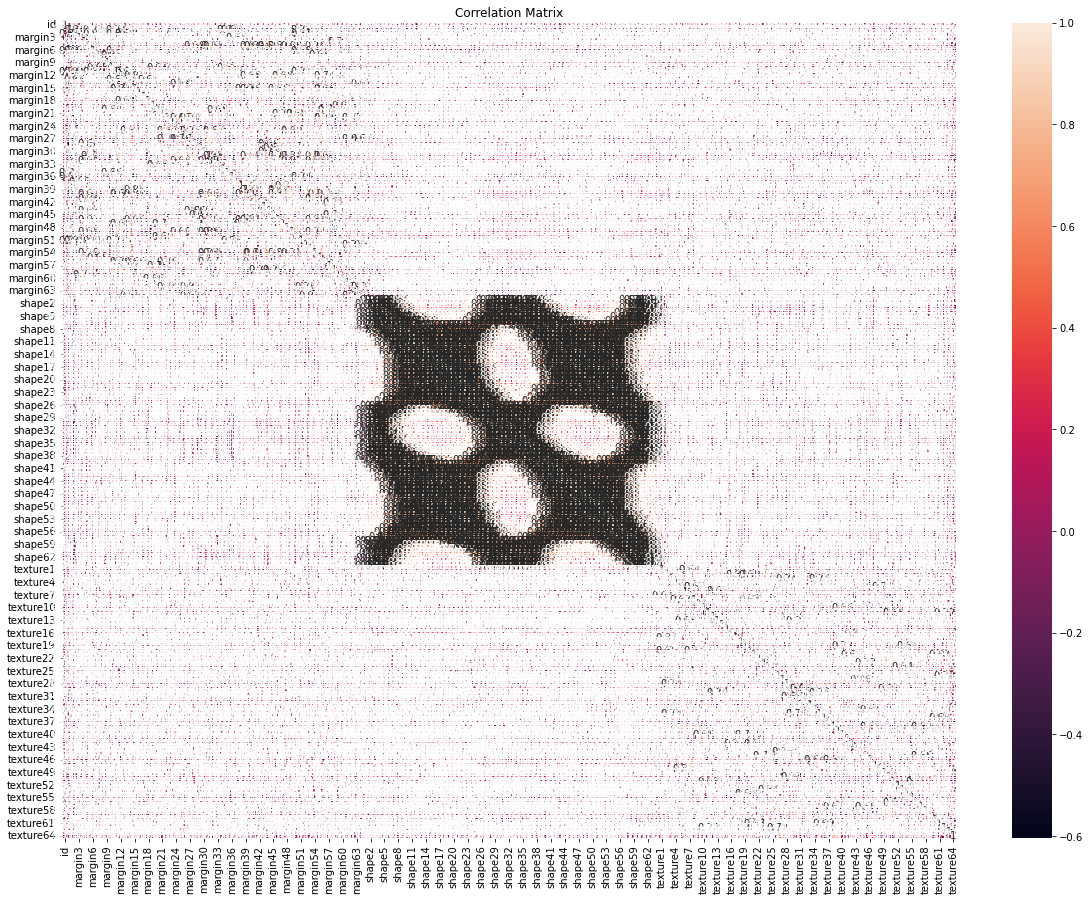

In [22]:
plt.rcParams["figure.figsize"] = (20,15) 
sns.heatmap(train.corr().abs(), annot =True)
plt.title('Correlation Matrix')

In [34]:
correlation_matrix = train.corr().abs()
print(correlation_matrix)
     

                 id   margin1   margin2   margin3   margin4   margin5  \
id         1.000000  0.011673  0.027565  0.059533  0.001639  0.002419   
margin1    0.011673  1.000000  0.806390  0.182829  0.297807  0.475874   
margin2    0.027565  0.806390  1.000000  0.204640  0.315953  0.444312   
margin3    0.059533  0.182829  0.204640  1.000000  0.120042  0.185007   
margin4    0.001639  0.297807  0.315953  0.120042  1.000000  0.029480   
...             ...       ...       ...       ...       ...       ...   
texture60  0.000823  0.035072  0.081069  0.019850  0.052317  0.006542   
texture61  0.026319  0.007581  0.007057  0.084957  0.320644  0.109229   
texture62  0.032873  0.033159  0.037405  0.081999  0.073886  0.151675   
texture63  0.024299  0.075171  0.098957  0.148193  0.050970  0.022299   
texture64  0.035396  0.030414  0.029532  0.061780  0.014343  0.148834   

            margin6   margin7   margin8   margin9  ...  texture55  texture56  \
id         0.051818  0.061214  0.039509  0.

In [35]:
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))
print(upper_tri)


           id   margin1   margin2   margin3   margin4   margin5   margin6  \
id        NaN  0.011673  0.027565  0.059533  0.001639  0.002419  0.051818   
margin1   NaN       NaN  0.806390  0.182829  0.297807  0.475874  0.767718   
margin2   NaN       NaN       NaN  0.204640  0.315953  0.444312  0.825762   
margin3   NaN       NaN       NaN       NaN  0.120042  0.185007  0.163976   
margin4   NaN       NaN       NaN       NaN       NaN  0.029480  0.261437   
...        ..       ...       ...       ...       ...       ...       ...   
texture60 NaN       NaN       NaN       NaN       NaN       NaN       NaN   
texture61 NaN       NaN       NaN       NaN       NaN       NaN       NaN   
texture62 NaN       NaN       NaN       NaN       NaN       NaN       NaN   
texture63 NaN       NaN       NaN       NaN       NaN       NaN       NaN   
texture64 NaN       NaN       NaN       NaN       NaN       NaN       NaN   

            margin7   margin8   margin9  ...  texture55  texture56  texture

<ipython-input-35-c0babd1392ab>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))


In [36]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

['shape2', 'shape3', 'shape4', 'shape5', 'shape6', 'shape7', 'shape8', 'shape9', 'shape10', 'shape11', 'shape12', 'shape13', 'shape14', 'shape15', 'shape16', 'shape17', 'shape18', 'shape19', 'shape20', 'shape21', 'shape22', 'shape23', 'shape24', 'shape25', 'shape26', 'shape27', 'shape28', 'shape29', 'shape30', 'shape31', 'shape32', 'shape33', 'shape34', 'shape35', 'shape36', 'shape37', 'shape38', 'shape39', 'shape40', 'shape41', 'shape42', 'shape43', 'shape44', 'shape45', 'shape46', 'shape47', 'shape48', 'shape49', 'shape50', 'shape51', 'shape52', 'shape53', 'shape54', 'shape55', 'shape56', 'shape57', 'shape58', 'shape59', 'shape60', 'shape61', 'shape62', 'shape63', 'shape64']


# spilt data into train set and test set

In [37]:
x =  train.drop('species',axis = 1)
Y = train.species.values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Y)



In [38]:
x.corr()


,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,1.000000,-0.011673,-0.027565,-0.059533,0.001639,-0.002419,-0.051818,0.061214,-0.039509,-0.070954,...,-0.040292,-0.005132,-0.043101,0.063337,-0.007915,-0.000823,0.026319,0.032873,0.024299,0.035396
margin1,-0.011673,1.000000,0.806390,-0.182829,-0.297807,-0.475874,0.767718,0.066273,-0.094137,-0.181496,...,0.137158,-0.047771,0.126227,-0.024139,-0.168201,0.035072,-0.007581,-0.033159,-0.075171,0.030414
margin2,-0.027565,0.806390,1.000000,-0.204640,-0.315953,-0.444312,0.825762,-0.083273,-0.086428,-0.120276,...,0.154407,-0.021096,0.123834,-0.063654,-0.157842,0.081069,-0.007057,-0.037405,-0.098957,-0.029532
margin3,-0.059533,-0.182829,-0.204640,1.000000,0.120042,-0.185007,-0.163976,0.095449,0.024350,-0.000042,...,0.047347,-0.027618,0.007261,-0.021390,0.033505,-0.019850,0.084957,-0.081999,-0.148193,0.061780
margin4,0.001639,-0.297807,-0.315953,0.120042,1.000000,0.029480,-0.261437,-0.268271,-0.047693,0.227543,...,-0.071974,-0.009537,-0.050529,-0.044318,0.088857,-0.052317,0.320644,-0.073886,0.050970,0.014343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
texture60,-0.000823,0.035072,0.081069,-0.019850,-0.052317,0.006542,0.066262,-0.034094,0.048647,-0.028292,...,-0.129365,0.004412,-0.155187,0.240704,-0.183369,1.000000,-0.051838,0.265879,-0.089679,-0.190194
texture61,0.026319,-0.007581,-0.007057,0.084957,0.320644,-0.109229,-0.050498,-0.163375,-0.079283,0.088517,...,-0.002235,0.053707,-0.072814,-0.084638,-0.023539,-0.051838,1.000000,-0.063582,-0.068065,0.036374
texture62,0.032873,-0.033159,-0.037405,-0.081999,-0.073886,0.151675,-0.031555,0.015391,-0.048843,-0.031954,...,-0.217239,0.171577,-0.283316,0.563088,-0.128010,0.265879,-0.063582,1.000000,-0.058189,-0.245527
texture63,0.024299,-0.075171,-0.098957,-0.148193,0.050970,0.022299,-0.132087,-0.001364,0.027758,-0.119494,...,-0.207887,0.002057,-0.064724,-0.059866,0.156568,-0.089679,-0.068065,-0.058189,1.000000,0.029305


In [39]:
x.shape

(990, 193)

In [40]:
y.shape

(990,)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 5, train_size=0.75,shuffle = True)

# Normalize data

In [42]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)


In [43]:
print('mean',scaler.mean_)
print('scale',scaler.scale_)

mean [7.83587601e+02 1.70990108e-02 2.80518248e-02 3.21133841e-02
 2.28478140e-02 1.46404784e-02 3.82439313e-02 1.92074434e-02
 1.06863208e-03 7.43858221e-03 1.85072790e-02 2.38112318e-02
 1.20872049e-02 4.08340647e-02 8.00983962e-03 1.59171348e-02
 1.18447439e-04 1.49379515e-02 1.98286550e-02 1.22582911e-02
 1.30348140e-02 1.90626523e-02 6.16465903e-03 1.14501078e-03
 7.84665499e-03 8.85481806e-03 1.87363059e-02 5.69612129e-03
 1.57223464e-02 2.80860162e-02 1.63698666e-02 1.10843154e-02
 1.00314367e-02 1.94311792e-02 1.03967790e-03 1.30716779e-02
 1.79650202e-02 1.62725121e-02 3.12131307e-02 1.51880040e-02
 8.27043396e-03 1.14159771e-02 1.70016132e-02 1.87968167e-02
 1.28952965e-02 2.42060701e-02 1.00577183e-02 2.50510040e-02
 2.74858666e-02 8.82587197e-03 1.39060970e-02 2.55643208e-02
 2.94542318e-03 2.43956199e-02 1.02472790e-02 1.86888935e-02
 5.89615364e-03 1.26136429e-02 1.93548464e-02 3.06893005e-02
 1.20240323e-02 1.39500809e-03 5.15124394e-03 2.54853598e-02
 4.59581671e-03 7.2

# Data Visualizing

Visualize the data using proper visualization methods. 


Sample of the species

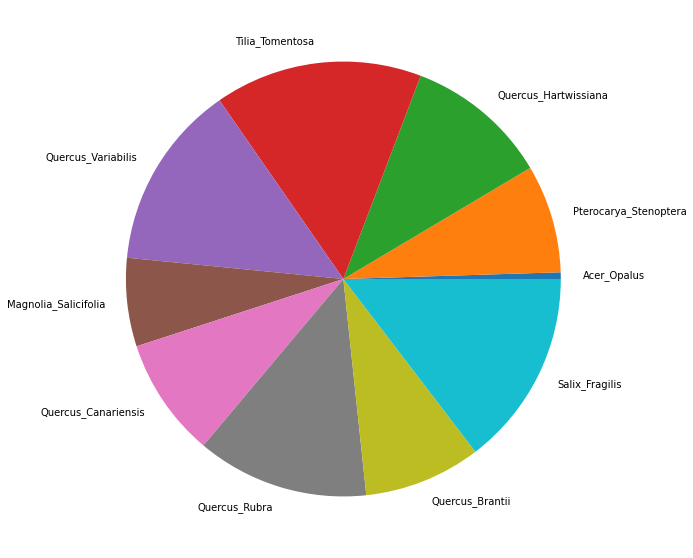

In [44]:
Figure = plt.figure(figsize =(15, 10))
plt.pie(y[:10],labels=train['species'][:10]);


# **Part II: Training a neural network**

Define the model

In [50]:

def ANN(batch_size, hidden_dropout, Regularization, learning_rate, hidden_Size, n_epoches):
  #Build ANN MODEL
  Model = Sequential()
  Model.add(keras.layers.Flatten())
  #hidden layers
  Model.add(Dense(hidden_Size,activation='tanh'))
  #Dropout layer
  Model.add(Dropout(hidden_dropout))
  #Output layer 
  Model.add(Dense(99, activation='softmax'))

  #I am try using different optimizers such as SGD, Adam, RMSProp and I found Adam was the best
  opt1 = keras.optimizers.SGD(learning_rate=learning_rate)
  opt2 = keras.optimizers.Adam(learning_rate=learning_rate)
  opt3 = keras.optimizers.RMSprop(learning_rate=learning_rate)

  Model.compile(loss='sparse_categorical_crossentropy',optimizer=opt2, metrics=['accuracy'] )
  history = Model.fit(x_train, y_train, epochs=50,validation_data=(x_test,y_test))
  acc = history.history['accuracy']
  loss = history.history['loss']
  Model.build(x_train.shape)
  print(Model.summary())
  plt.subplot(1, 2, 1)
  plt.plot(acc)
  plt.subplot(1, 2, 1)
  plt.plot(loss)
  plt.title('model loss & accuracy')
  plt.show()
  print(Model.evaluate(x_test, y_test, verbose=1))


I create function that take (batch size, hidden dropout, Regularization,
Learning rate, hidden Size, no. epoches)


Epoch 1/50
24/24 [==============================] - 1s 16ms/step - loss: 4.0284 - accuracy: 0.1631 - val_loss: 3.3771 - val_accuracy: 0.3347
Epoch 2/50
24/24 [==============================] - 0s 6ms/step - loss: 2.7347 - accuracy: 0.5391 - val_loss: 2.4960 - val_accuracy: 0.5645
Epoch 3/50
24/24 [==============================] - 0s 4ms/step - loss: 1.8492 - accuracy: 0.7642 - val_loss: 1.8279 - val_accuracy: 0.7298
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 1.2808 - accuracy: 0.8639 - val_loss: 1.4228 - val_accuracy: 0.7661
Epoch 5/50
24/24 [==============================] - 0s 4ms/step - loss: 0.9282 - accuracy: 0.9084 - val_loss: 1.1236 - val_accuracy: 0.8548
Epoch 6/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.9488 - val_loss: 0.9190 - val_accuracy: 0.8871
Epoch 7/50
24/24 [==============================] - 0s 3ms/step - loss: 0.5185 - accuracy: 0.9609 - val_loss: 0.8059 - val_accuracy: 0.8831
Epoch 8/50
24/24 [=

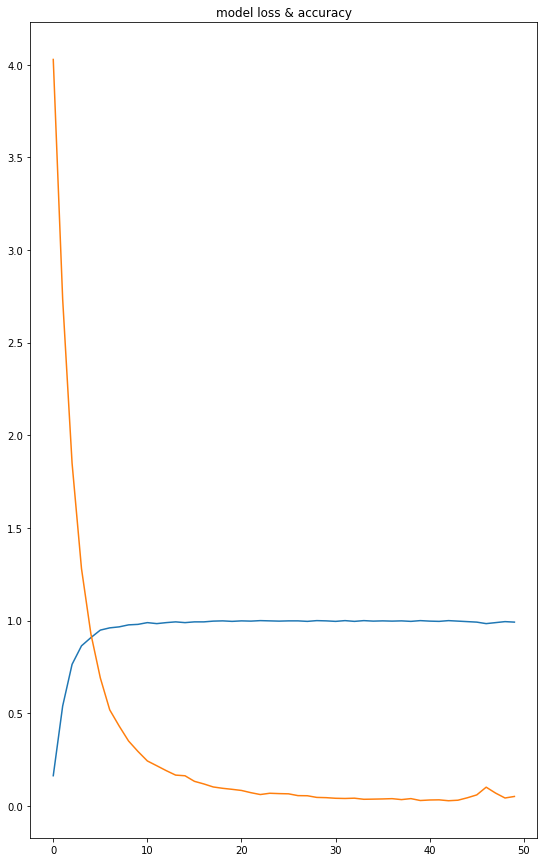

8/8 [==============================] - 0s 4ms/step - loss: 0.3682 - accuracy: 0.8831
[0.36819079518318176, 0.8830645084381104]


In [51]:
#Call the Function with different values
ANN(32,0.1,0,0.01,20,100)


Instantiate the tuner and perform hypertuning

Epoch 1/50
24/24 [==============================] - 1s 14ms/step - loss: 3.9838 - accuracy: 0.1577 - val_loss: 3.4294 - val_accuracy: 0.3306
Epoch 2/50
24/24 [==============================] - 0s 5ms/step - loss: 2.7373 - accuracy: 0.5768 - val_loss: 2.5894 - val_accuracy: 0.5524
Epoch 3/50
24/24 [==============================] - 0s 5ms/step - loss: 1.9432 - accuracy: 0.7224 - val_loss: 2.0045 - val_accuracy: 0.6653
Epoch 4/50
24/24 [==============================] - 0s 6ms/step - loss: 1.3896 - accuracy: 0.8288 - val_loss: 1.5657 - val_accuracy: 0.7460
Epoch 5/50
24/24 [==============================] - 0s 8ms/step - loss: 0.9875 - accuracy: 0.9111 - val_loss: 1.2571 - val_accuracy: 0.7944
Epoch 6/50
24/24 [==============================] - 0s 7ms/step - loss: 0.7268 - accuracy: 0.9367 - val_loss: 1.0145 - val_accuracy: 0.8306
Epoch 7/50
24/24 [==============================] - 0s 5ms/step - loss: 0.5612 - accuracy: 0.9542 - val_loss: 0.8666 - val_accuracy: 0.8710
Epoch 8/50
24/24 [=

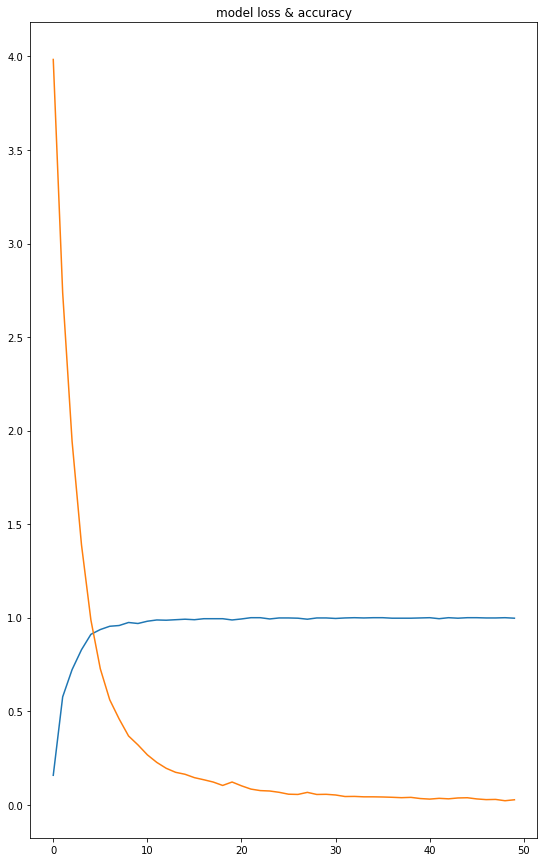

8/8 [==============================] - 0s 2ms/step - loss: 0.3880 - accuracy: 0.8952
[0.38800233602523804, 0.8951612710952759]
Epoch 1/50
24/24 [==============================] - 1s 10ms/step - loss: 4.0405 - accuracy: 0.1361 - val_loss: 3.3295 - val_accuracy: 0.3589
Epoch 2/50
24/24 [==============================] - 0s 4ms/step - loss: 2.7539 - accuracy: 0.5458 - val_loss: 2.4624 - val_accuracy: 0.5524
Epoch 3/50
24/24 [==============================] - 0s 4ms/step - loss: 1.9328 - accuracy: 0.7210 - val_loss: 1.9263 - val_accuracy: 0.6734
Epoch 4/50
24/24 [==============================] - 0s 5ms/step - loss: 1.3691 - accuracy: 0.8396 - val_loss: 1.4918 - val_accuracy: 0.7661
Epoch 5/50
24/24 [==============================] - 0s 4ms/step - loss: 0.9902 - accuracy: 0.8976 - val_loss: 1.1878 - val_accuracy: 0.7823
Epoch 6/50
24/24 [==============================] - 0s 4ms/step - loss: 0.7461 - accuracy: 0.9191 - val_loss: 0.9738 - val_accuracy: 0.8589
Epoch 7/50
24/24 [==============

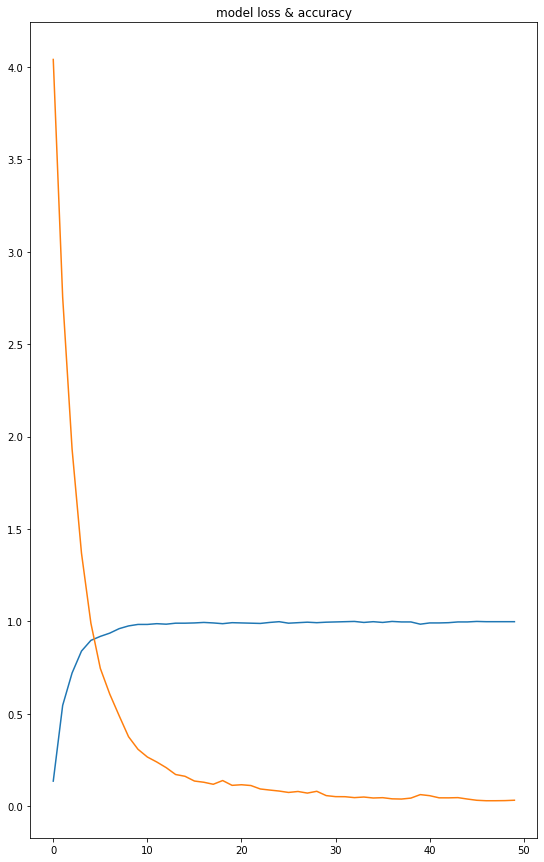

8/8 [==============================] - 0s 4ms/step - loss: 0.3817 - accuracy: 0.9153
[0.38174891471862793, 0.9153226017951965]
Epoch 1/50
24/24 [==============================] - 1s 10ms/step - loss: 4.0470 - accuracy: 0.1402 - val_loss: 3.4439 - val_accuracy: 0.2742
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 2.7807 - accuracy: 0.5135 - val_loss: 2.6266 - val_accuracy: 0.4919
Epoch 3/50
24/24 [==============================] - 0s 3ms/step - loss: 1.9596 - accuracy: 0.7210 - val_loss: 2.0324 - val_accuracy: 0.6331
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 1.4101 - accuracy: 0.8477 - val_loss: 1.5538 - val_accuracy: 0.7621
Epoch 5/50
24/24 [==============================] - 0s 4ms/step - loss: 1.0005 - accuracy: 0.8976 - val_loss: 1.2462 - val_accuracy: 0.8145
Epoch 6/50
24/24 [==============================] - 0s 4ms/step - loss: 0.7720 - accuracy: 0.9313 - val_loss: 1.0171 - val_accuracy: 0.8468
Epoch 7/50
24/24 [==============

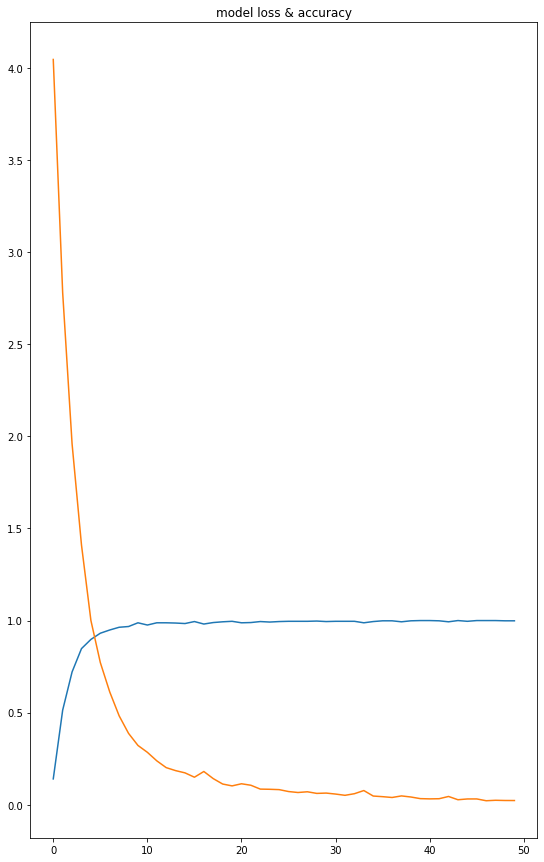

8/8 [==============================] - 0s 3ms/step - loss: 0.3245 - accuracy: 0.8911
[0.3245091140270233, 0.8911290168762207]


In [52]:
#try different values of batch sizes
batch_sizes=[64,128,256]
for i in batch_sizes:
  ANN(i,0.1,0,0.01,20,100)

Epoch 1/50
24/24 [==============================] - 3s 34ms/step - loss: 4.2885 - accuracy: 0.0903 - val_loss: 3.9506 - val_accuracy: 0.1573
Epoch 2/50
24/24 [==============================] - 0s 21ms/step - loss: 3.5654 - accuracy: 0.2911 - val_loss: 3.4580 - val_accuracy: 0.2742
Epoch 3/50
24/24 [==============================] - 1s 35ms/step - loss: 3.0453 - accuracy: 0.4111 - val_loss: 3.0622 - val_accuracy: 0.3468
Epoch 4/50
24/24 [==============================] - 1s 23ms/step - loss: 2.5988 - accuracy: 0.5108 - val_loss: 2.7506 - val_accuracy: 0.3952
Epoch 5/50
24/24 [==============================] - 0s 13ms/step - loss: 2.2850 - accuracy: 0.5863 - val_loss: 2.4835 - val_accuracy: 0.4556
Epoch 6/50
24/24 [==============================] - 0s 14ms/step - loss: 2.0323 - accuracy: 0.6280 - val_loss: 2.2582 - val_accuracy: 0.5121
Epoch 7/50
24/24 [==============================] - 1s 25ms/step - loss: 1.8090 - accuracy: 0.6685 - val_loss: 2.0742 - val_accuracy: 0.5444
Epoch 8/50
24

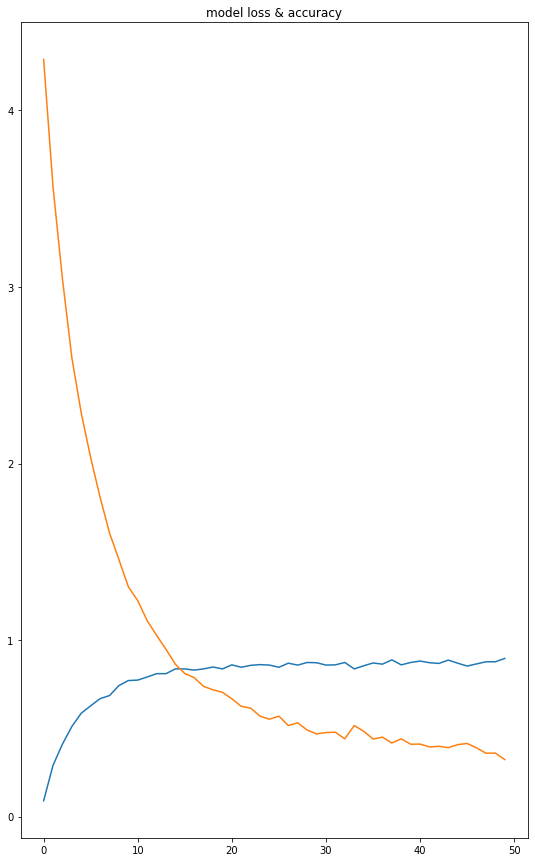

8/8 [==============================] - 0s 2ms/step - loss: 0.9414 - accuracy: 0.7419
[0.9413713216781616, 0.7419354915618896]
Epoch 1/50
24/24 [==============================] - 1s 11ms/step - loss: 4.0955 - accuracy: 0.1294 - val_loss: 3.5011 - val_accuracy: 0.2823
Epoch 2/50
24/24 [==============================] - 0s 4ms/step - loss: 2.7808 - accuracy: 0.5782 - val_loss: 2.5671 - val_accuracy: 0.5484
Epoch 3/50
24/24 [==============================] - 0s 4ms/step - loss: 1.9196 - accuracy: 0.7695 - val_loss: 1.9014 - val_accuracy: 0.7137
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 1.3207 - accuracy: 0.8491 - val_loss: 1.4522 - val_accuracy: 0.7702
Epoch 5/50
24/24 [==============================] - 0s 5ms/step - loss: 0.9667 - accuracy: 0.8949 - val_loss: 1.1772 - val_accuracy: 0.8306
Epoch 6/50
24/24 [==============================] - 0s 4ms/step - loss: 0.7214 - accuracy: 0.9447 - val_loss: 0.9429 - val_accuracy: 0.8669
Epoch 7/50
24/24 [===============

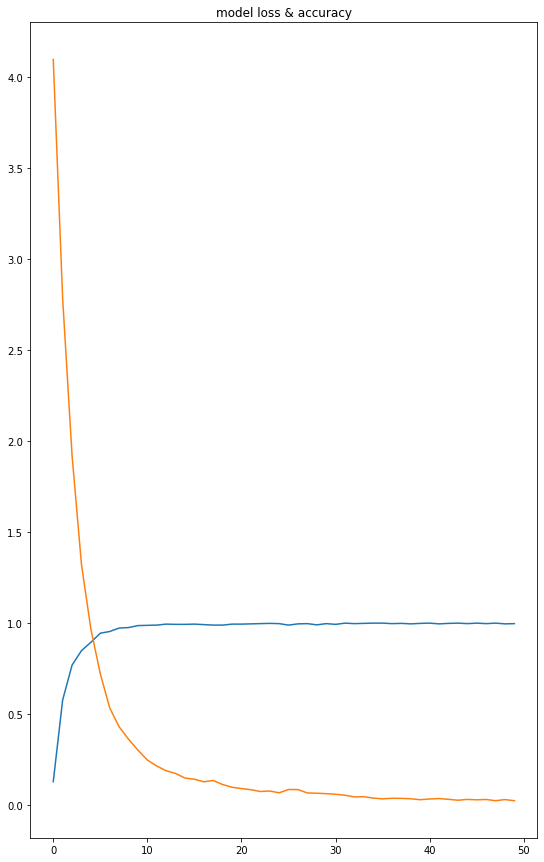

8/8 [==============================] - 0s 2ms/step - loss: 0.3125 - accuracy: 0.9153
[0.3125082850456238, 0.9153226017951965]
Epoch 1/50
24/24 [==============================] - 1s 10ms/step - loss: 3.7418 - accuracy: 0.2278 - val_loss: 2.9360 - val_accuracy: 0.4556
Epoch 2/50
24/24 [==============================] - 0s 4ms/step - loss: 2.0880 - accuracy: 0.7170 - val_loss: 1.8328 - val_accuracy: 0.7419
Epoch 3/50
24/24 [==============================] - 0s 4ms/step - loss: 1.1777 - accuracy: 0.8693 - val_loss: 1.2247 - val_accuracy: 0.8226
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 0.7082 - accuracy: 0.9367 - val_loss: 0.8111 - val_accuracy: 0.9153
Epoch 5/50
24/24 [==============================] - 0s 4ms/step - loss: 0.4373 - accuracy: 0.9677 - val_loss: 0.6353 - val_accuracy: 0.9113
Epoch 6/50
24/24 [==============================] - 0s 4ms/step - loss: 0.3027 - accuracy: 0.9838 - val_loss: 0.5273 - val_accuracy: 0.9274
Epoch 7/50
24/24 [===============

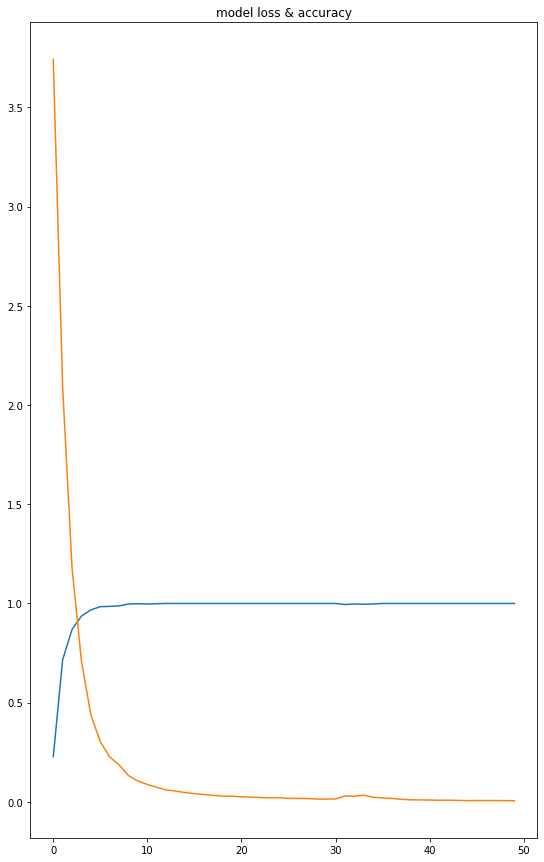

8/8 [==============================] - 0s 3ms/step - loss: 0.2331 - accuracy: 0.9395
[0.23306156694889069, 0.9395161271095276]
Epoch 1/50
24/24 [==============================] - 1s 15ms/step - loss: 3.5044 - accuracy: 0.2547 - val_loss: 2.5536 - val_accuracy: 0.5282
Epoch 2/50
24/24 [==============================] - 0s 6ms/step - loss: 1.6061 - accuracy: 0.7682 - val_loss: 1.3409 - val_accuracy: 0.8185
Epoch 3/50
24/24 [==============================] - 0s 5ms/step - loss: 0.7614 - accuracy: 0.9447 - val_loss: 0.7717 - val_accuracy: 0.9113
Epoch 4/50
24/24 [==============================] - 0s 7ms/step - loss: 0.4054 - accuracy: 0.9717 - val_loss: 0.5105 - val_accuracy: 0.9355
Epoch 5/50
24/24 [==============================] - 0s 5ms/step - loss: 0.2387 - accuracy: 0.9906 - val_loss: 0.3999 - val_accuracy: 0.9476
Epoch 6/50
24/24 [==============================] - 0s 5ms/step - loss: 0.1762 - accuracy: 0.9865 - val_loss: 0.3484 - val_accuracy: 0.9435
Epoch 7/50
24/24 [==============

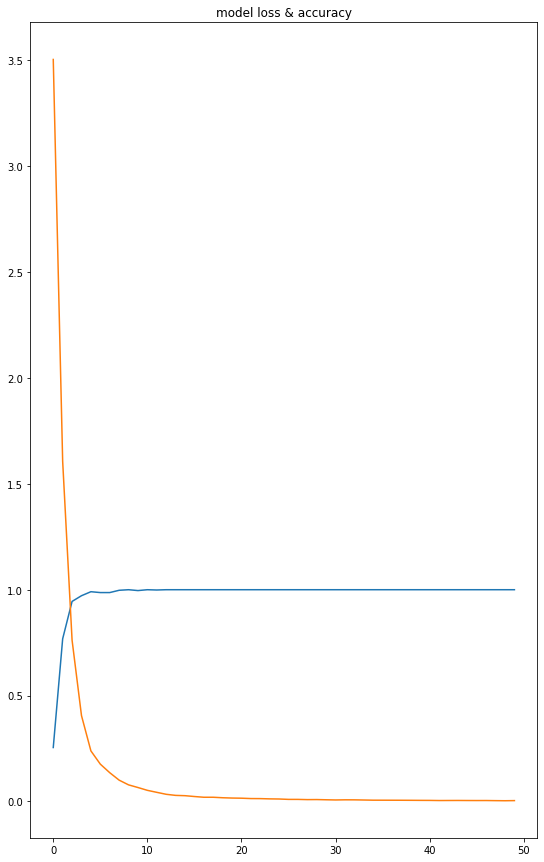

8/8 [==============================] - 0s 2ms/step - loss: 0.1193 - accuracy: 0.9637
[0.11927899718284607, 0.9637096524238586]


In [54]:
#try different values of hidden_Size
hidden_Size=[10,20,30,40]
for i in hidden_Size:
  ANN(64,0.1,0,0.01,i,100)

Epoch 1/50
24/24 [==============================] - 1s 11ms/step - loss: 3.9984 - accuracy: 0.1698 - val_loss: 3.3144 - val_accuracy: 0.3992
Epoch 2/50
24/24 [==============================] - 0s 5ms/step - loss: 2.5982 - accuracy: 0.6685 - val_loss: 2.4121 - val_accuracy: 0.5927
Epoch 3/50
24/24 [==============================] - 0s 4ms/step - loss: 1.6895 - accuracy: 0.8598 - val_loss: 1.7947 - val_accuracy: 0.6935
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 1.1408 - accuracy: 0.8922 - val_loss: 1.3960 - val_accuracy: 0.7581
Epoch 5/50
24/24 [==============================] - 0s 3ms/step - loss: 0.7756 - accuracy: 0.9367 - val_loss: 1.0903 - val_accuracy: 0.8306
Epoch 6/50
24/24 [==============================] - 0s 4ms/step - loss: 0.5440 - accuracy: 0.9690 - val_loss: 0.8942 - val_accuracy: 0.8629
Epoch 7/50
24/24 [==============================] - 0s 5ms/step - loss: 0.3965 - accuracy: 0.9798 - val_loss: 0.7887 - val_accuracy: 0.8387
Epoch 8/50
24/24 [=

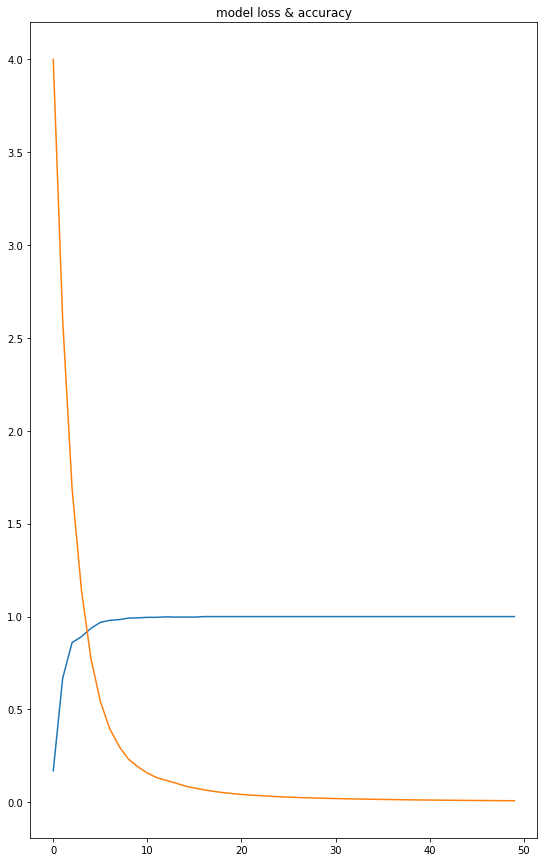

8/8 [==============================] - 0s 3ms/step - loss: 0.3317 - accuracy: 0.9113
[0.3316749334335327, 0.9112903475761414]
Epoch 1/50
24/24 [==============================] - 1s 15ms/step - loss: 4.0235 - accuracy: 0.1577 - val_loss: 3.4290 - val_accuracy: 0.3669
Epoch 2/50
24/24 [==============================] - 0s 4ms/step - loss: 2.7553 - accuracy: 0.5809 - val_loss: 2.5461 - val_accuracy: 0.5847
Epoch 3/50
24/24 [==============================] - 0s 4ms/step - loss: 1.8897 - accuracy: 0.7601 - val_loss: 1.9034 - val_accuracy: 0.7258
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 1.3166 - accuracy: 0.8652 - val_loss: 1.4491 - val_accuracy: 0.7944
Epoch 5/50
24/24 [==============================] - 0s 3ms/step - loss: 0.9266 - accuracy: 0.9205 - val_loss: 1.1073 - val_accuracy: 0.8629
Epoch 6/50
24/24 [==============================] - 0s 4ms/step - loss: 0.6879 - accuracy: 0.9488 - val_loss: 0.8985 - val_accuracy: 0.8952
Epoch 7/50
24/24 [===============

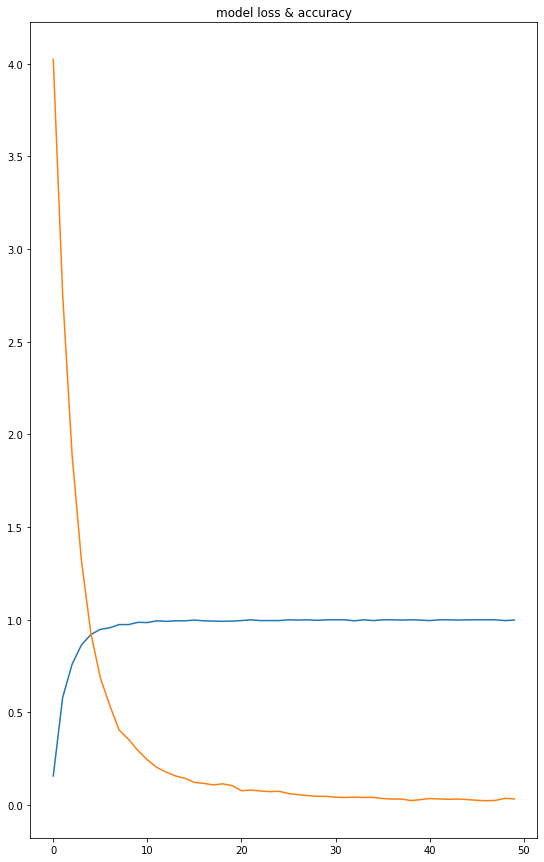

8/8 [==============================] - 0s 3ms/step - loss: 0.2726 - accuracy: 0.9435
[0.27258995175361633, 0.9435483813285828]
Epoch 1/50
24/24 [==============================] - 1s 15ms/step - loss: 4.1954 - accuracy: 0.1051 - val_loss: 3.5811 - val_accuracy: 0.3347
Epoch 2/50
24/24 [==============================] - 0s 5ms/step - loss: 3.0087 - accuracy: 0.4501 - val_loss: 2.7398 - val_accuracy: 0.5000
Epoch 3/50
24/24 [==============================] - 0s 6ms/step - loss: 2.2435 - accuracy: 0.6213 - val_loss: 2.1436 - val_accuracy: 0.6371
Epoch 4/50
24/24 [==============================] - 0s 8ms/step - loss: 1.7067 - accuracy: 0.7278 - val_loss: 1.6910 - val_accuracy: 0.7500
Epoch 5/50
24/24 [==============================] - 0s 6ms/step - loss: 1.3074 - accuracy: 0.8181 - val_loss: 1.3926 - val_accuracy: 0.7782
Epoch 6/50
24/24 [==============================] - 0s 5ms/step - loss: 1.1001 - accuracy: 0.8369 - val_loss: 1.1284 - val_accuracy: 0.8266
Epoch 7/50
24/24 [==============

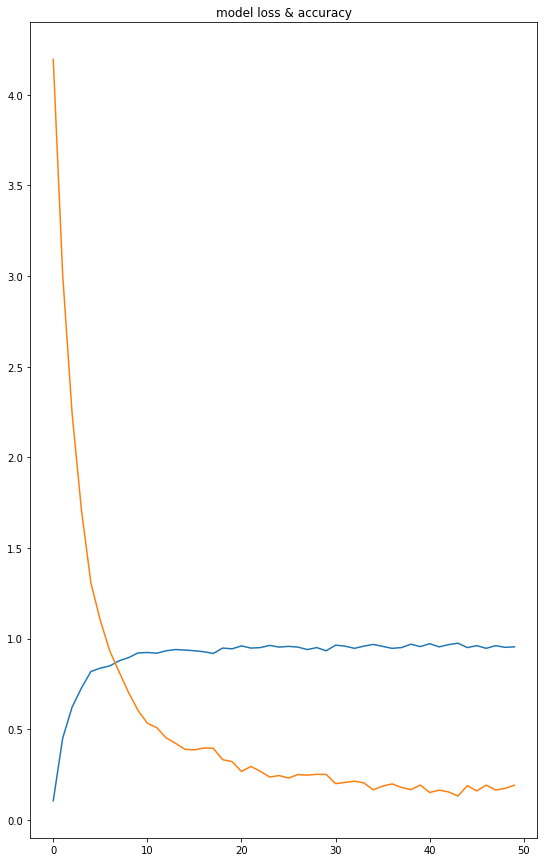

8/8 [==============================] - 0s 3ms/step - loss: 0.2998 - accuracy: 0.9153
[0.29983267188072205, 0.9153226017951965]
Epoch 1/50
24/24 [==============================] - 1s 10ms/step - loss: 4.2372 - accuracy: 0.0782 - val_loss: 3.7442 - val_accuracy: 0.2621
Epoch 2/50
24/24 [==============================] - 0s 4ms/step - loss: 3.3278 - accuracy: 0.2655 - val_loss: 3.0192 - val_accuracy: 0.5000
Epoch 3/50
24/24 [==============================] - 0s 4ms/step - loss: 2.7494 - accuracy: 0.3841 - val_loss: 2.5123 - val_accuracy: 0.5968
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 2.3141 - accuracy: 0.5081 - val_loss: 2.0968 - val_accuracy: 0.7056
Epoch 5/50
24/24 [==============================] - 0s 4ms/step - loss: 1.9679 - accuracy: 0.5580 - val_loss: 1.7542 - val_accuracy: 0.7581
Epoch 6/50
24/24 [==============================] - 0s 4ms/step - loss: 1.6906 - accuracy: 0.6186 - val_loss: 1.5043 - val_accuracy: 0.8024
Epoch 7/50
24/24 [==============

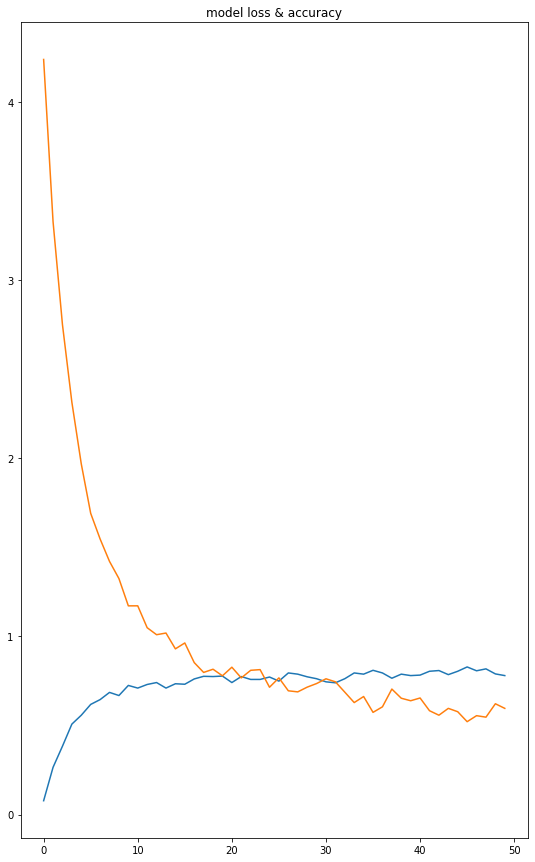

8/8 [==============================] - 0s 3ms/step - loss: 0.3317 - accuracy: 0.9153
[0.3316817879676819, 0.9153226017951965]
Epoch 1/50
24/24 [==============================] - 1s 10ms/step - loss: 4.5144 - accuracy: 0.0431 - val_loss: 4.0283 - val_accuracy: 0.1411
Epoch 2/50
24/24 [==============================] - 0s 4ms/step - loss: 3.8642 - accuracy: 0.1267 - val_loss: 3.5500 - val_accuracy: 0.3387
Epoch 3/50
24/24 [==============================] - 0s 4ms/step - loss: 3.3945 - accuracy: 0.1779 - val_loss: 3.1413 - val_accuracy: 0.4556
Epoch 4/50
24/24 [==============================] - 0s 3ms/step - loss: 3.1144 - accuracy: 0.2278 - val_loss: 2.8211 - val_accuracy: 0.5202
Epoch 5/50
24/24 [==============================] - 0s 4ms/step - loss: 2.9307 - accuracy: 0.2507 - val_loss: 2.5272 - val_accuracy: 0.5847
Epoch 6/50
24/24 [==============================] - 0s 4ms/step - loss: 2.7091 - accuracy: 0.2776 - val_loss: 2.2670 - val_accuracy: 0.6331
Epoch 7/50
24/24 [===============

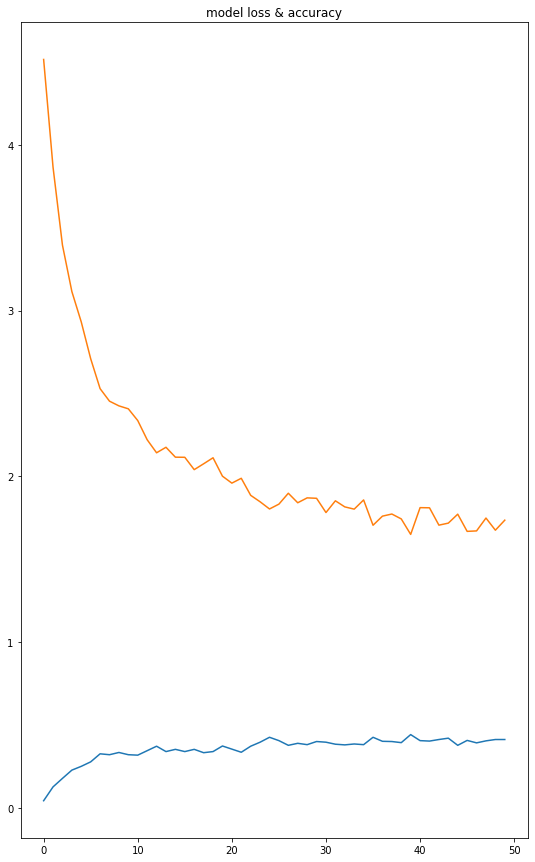

8/8 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.8185
[0.6812672019004822, 0.8185483813285828]


In [55]:
#try different values of hidden_dropout
hidden_dropout=[0,0.1,0.3,0.5,0.7]
for i in hidden_dropout:
  ANN(64,i,0,0.01,20,100)

Epoch 1/50
24/24 [==============================] - 2s 17ms/step - loss: 3.3562 - accuracy: 0.2291 - val_loss: 2.0770 - val_accuracy: 0.4798
Epoch 2/50
24/24 [==============================] - 0s 4ms/step - loss: 1.8185 - accuracy: 0.5202 - val_loss: 1.8625 - val_accuracy: 0.5282
Epoch 3/50
24/24 [==============================] - 0s 4ms/step - loss: 1.5424 - accuracy: 0.5647 - val_loss: 1.4374 - val_accuracy: 0.6210
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 1.3459 - accuracy: 0.6159 - val_loss: 1.0906 - val_accuracy: 0.6694
Epoch 5/50
24/24 [==============================] - 0s 4ms/step - loss: 0.9966 - accuracy: 0.6779 - val_loss: 1.2692 - val_accuracy: 0.6774
Epoch 6/50
24/24 [==============================] - 0s 4ms/step - loss: 0.9026 - accuracy: 0.7291 - val_loss: 0.9368 - val_accuracy: 0.7097
Epoch 7/50
24/24 [==============================] - 0s 4ms/step - loss: 0.8513 - accuracy: 0.7251 - val_loss: 1.0495 - val_accuracy: 0.6694
Epoch 8/50
24/24 [=

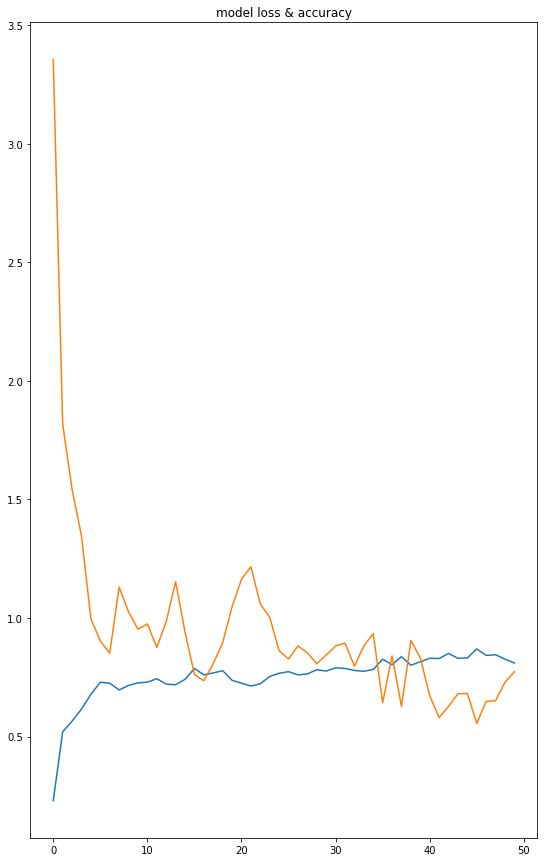

8/8 [==============================] - 0s 3ms/step - loss: 1.3646 - accuracy: 0.7298
[1.3645813465118408, 0.7298387289047241]
Epoch 1/50
24/24 [==============================] - 1s 12ms/step - loss: 3.5443 - accuracy: 0.2075 - val_loss: 2.4664 - val_accuracy: 0.4597
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 1.6681 - accuracy: 0.6253 - val_loss: 1.3429 - val_accuracy: 0.6935
Epoch 3/50
24/24 [==============================] - 0s 4ms/step - loss: 0.9510 - accuracy: 0.8005 - val_loss: 0.9595 - val_accuracy: 0.7742
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 0.6575 - accuracy: 0.8504 - val_loss: 0.7358 - val_accuracy: 0.7984
Epoch 5/50
24/24 [==============================] - 0s 3ms/step - loss: 0.4794 - accuracy: 0.9016 - val_loss: 0.6455 - val_accuracy: 0.8145
Epoch 6/50
24/24 [==============================] - 0s 4ms/step - loss: 0.4008 - accuracy: 0.8962 - val_loss: 0.6052 - val_accuracy: 0.8589
Epoch 7/50
24/24 [===============

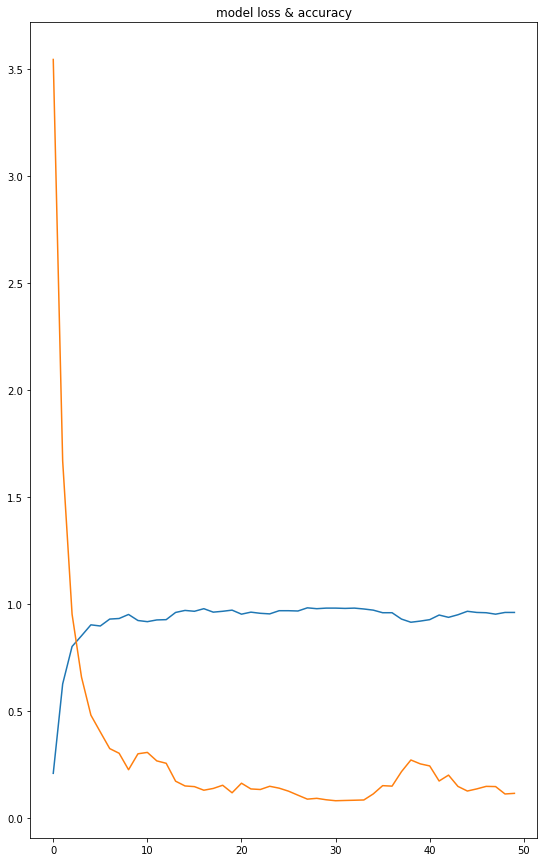

8/8 [==============================] - 0s 3ms/step - loss: 0.6793 - accuracy: 0.8306
[0.6792629957199097, 0.8306451439857483]
Epoch 1/50
24/24 [==============================] - 1s 16ms/step - loss: 4.0059 - accuracy: 0.1698 - val_loss: 3.3951 - val_accuracy: 0.3710
Epoch 2/50
24/24 [==============================] - 0s 5ms/step - loss: 2.7405 - accuracy: 0.5889 - val_loss: 2.5359 - val_accuracy: 0.5403
Epoch 3/50
24/24 [==============================] - 0s 5ms/step - loss: 1.9032 - accuracy: 0.7453 - val_loss: 1.9321 - val_accuracy: 0.6653
Epoch 4/50
24/24 [==============================] - 0s 5ms/step - loss: 1.3601 - accuracy: 0.8261 - val_loss: 1.4839 - val_accuracy: 0.7702
Epoch 5/50
24/24 [==============================] - 0s 6ms/step - loss: 0.9886 - accuracy: 0.8922 - val_loss: 1.2023 - val_accuracy: 0.7863
Epoch 6/50
24/24 [==============================] - 0s 5ms/step - loss: 0.7469 - accuracy: 0.9259 - val_loss: 0.9776 - val_accuracy: 0.8548
Epoch 7/50
24/24 [===============

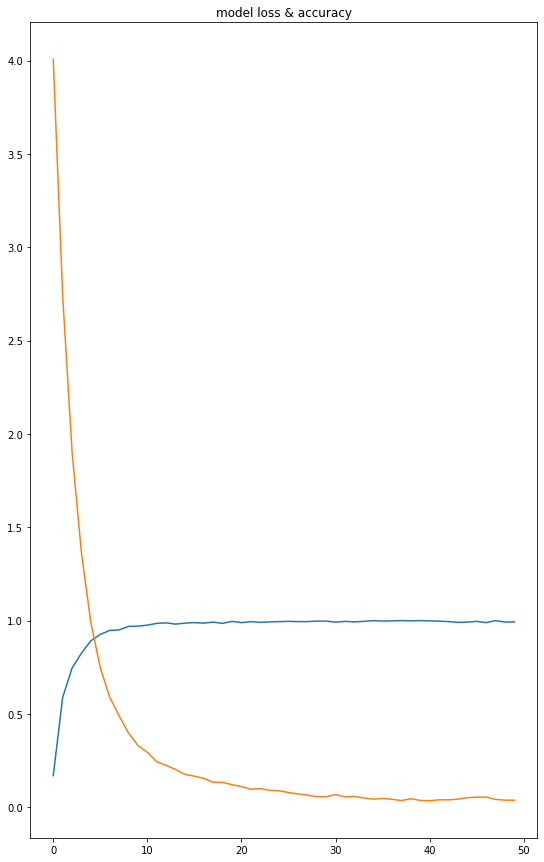

8/8 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.9073
[0.41005998849868774, 0.9072580933570862]
Epoch 1/50
24/24 [==============================] - 1s 11ms/step - loss: 4.6897 - accuracy: 0.0108 - val_loss: 4.6374 - val_accuracy: 0.0202
Epoch 2/50
24/24 [==============================] - 0s 4ms/step - loss: 4.6057 - accuracy: 0.0121 - val_loss: 4.5710 - val_accuracy: 0.0242
Epoch 3/50
24/24 [==============================] - 0s 4ms/step - loss: 4.5169 - accuracy: 0.0162 - val_loss: 4.5051 - val_accuracy: 0.0323
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 4.4337 - accuracy: 0.0296 - val_loss: 4.4447 - val_accuracy: 0.0403
Epoch 5/50
24/24 [==============================] - 0s 4ms/step - loss: 4.3681 - accuracy: 0.0431 - val_loss: 4.3874 - val_accuracy: 0.0403
Epoch 6/50
24/24 [==============================] - 0s 3ms/step - loss: 4.2941 - accuracy: 0.0580 - val_loss: 4.3340 - val_accuracy: 0.0524
Epoch 7/50
24/24 [==============

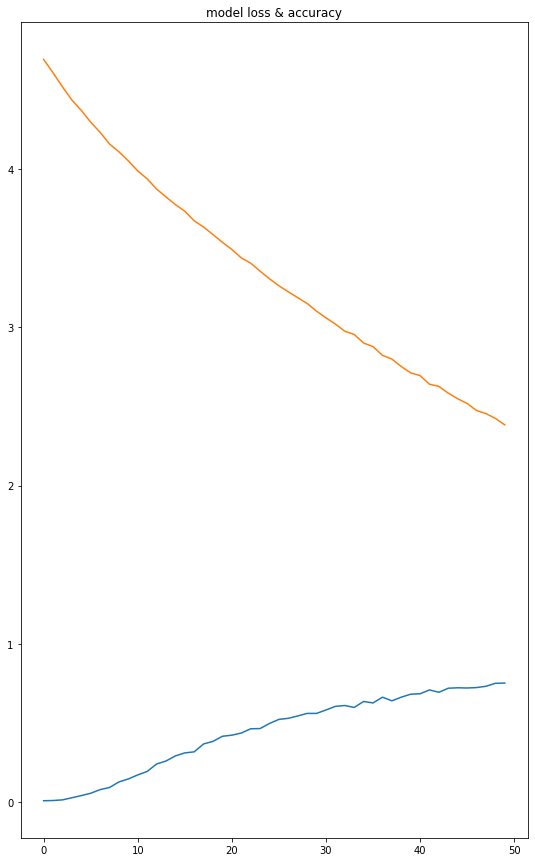

8/8 [==============================] - 0s 2ms/step - loss: 2.7555 - accuracy: 0.5887
[2.7555360794067383, 0.5887096524238586]


In [56]:
#try different values of learning_rates
learning_rates=[0.1,0.03,0.01,0.0003]
for i in learning_rates:
  ANN(64,0.1,0,i,20,100)

Epoch 1/50
24/24 [==============================] - 1s 10ms/step - loss: 4.0416 - accuracy: 0.1442 - val_loss: 3.3819 - val_accuracy: 0.2863
Epoch 2/50
24/24 [==============================] - 0s 6ms/step - loss: 2.7290 - accuracy: 0.5809 - val_loss: 2.5189 - val_accuracy: 0.6048
Epoch 3/50
24/24 [==============================] - 0s 5ms/step - loss: 1.8534 - accuracy: 0.7871 - val_loss: 1.8568 - val_accuracy: 0.7540
Epoch 4/50
24/24 [==============================] - 0s 5ms/step - loss: 1.2840 - accuracy: 0.8693 - val_loss: 1.4304 - val_accuracy: 0.7863
Epoch 5/50
24/24 [==============================] - 0s 5ms/step - loss: 0.9164 - accuracy: 0.9272 - val_loss: 1.1295 - val_accuracy: 0.8185
Epoch 6/50
24/24 [==============================] - 0s 5ms/step - loss: 0.6929 - accuracy: 0.9447 - val_loss: 0.8948 - val_accuracy: 0.8871
Epoch 7/50
24/24 [==============================] - 0s 5ms/step - loss: 0.5178 - accuracy: 0.9636 - val_loss: 0.7660 - val_accuracy: 0.8911
Epoch 8/50
24/24 [=

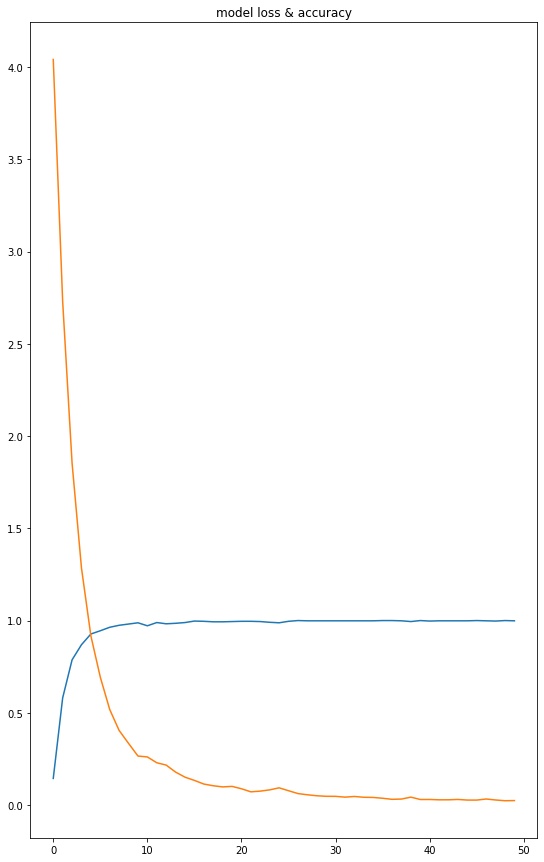

8/8 [==============================] - 0s 2ms/step - loss: 0.2946 - accuracy: 0.9234
[0.29455944895744324, 0.9233871102333069]


In [57]:
learningRate_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
ANN(64,0.1,0,learningRate_schedule,20,100)

Epoch 1/50
24/24 [==============================] - 1s 10ms/step - loss: 3.6854 - accuracy: 0.2372 - val_loss: 2.7005 - val_accuracy: 0.4839
Epoch 2/50
24/24 [==============================] - 0s 4ms/step - loss: 1.8885 - accuracy: 0.6644 - val_loss: 1.6468 - val_accuracy: 0.7097
Epoch 3/50
24/24 [==============================] - 0s 4ms/step - loss: 1.0990 - accuracy: 0.8221 - val_loss: 1.1027 - val_accuracy: 0.8347
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 0.7159 - accuracy: 0.8827 - val_loss: 0.8190 - val_accuracy: 0.8589
Epoch 5/50
24/24 [==============================] - 0s 4ms/step - loss: 0.4989 - accuracy: 0.9205 - val_loss: 0.6770 - val_accuracy: 0.8750
Epoch 6/50
24/24 [==============================] - 0s 4ms/step - loss: 0.3847 - accuracy: 0.9380 - val_loss: 0.6171 - val_accuracy: 0.8871
Epoch 7/50
24/24 [==============================] - 0s 4ms/step - loss: 0.3186 - accuracy: 0.9488 - val_loss: 0.5163 - val_accuracy: 0.8952
Epoch 8/50
24/24 [=

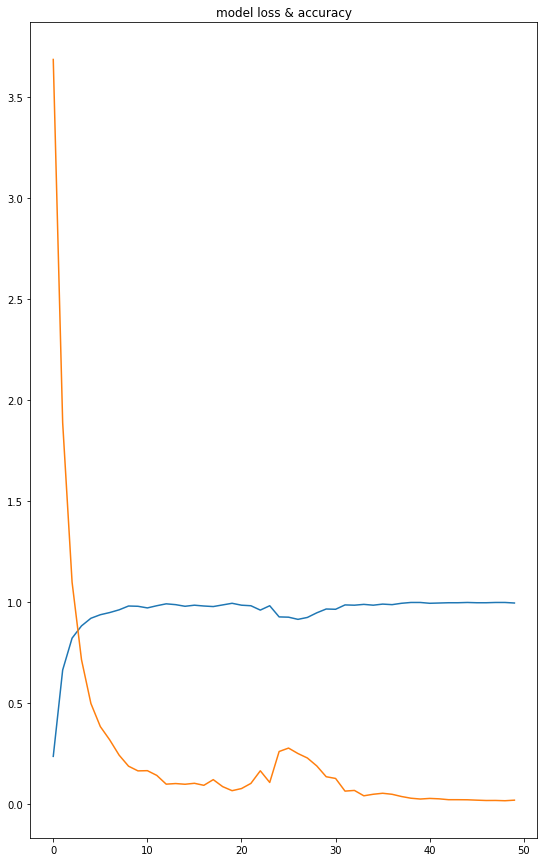

8/8 [==============================] - 0s 3ms/step - loss: 0.3342 - accuracy: 0.9274
[0.3341643214225769, 0.9274193644523621]


In [59]:
learningRate_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.02,
    decay_steps=10000,
    decay_rate=0.9)
ANN(64,0.1,0,learningRate_schedule,20,100)